# Kaggle Titanic Competition

This notebook was created to complete the Kaggle Titanic competition. Full details can be found here - https://www.kaggle.com/competitions/titanic/overview

This project was originally split across two notebooks, Preprocessing (notebook 1) and Machine Learning Model (notebook 2). These were combine into this final notebook for ease of viewing.

# Preprocessing - Notebook 1

## Reading the data

In [1]:
# importing required modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# reading raw train data
raw_data_train = pd.read_csv('train.csv', index_col= 'PassengerId')
raw_data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# extracting train targets
train_targets = raw_data_train['Survived']
train_targets

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [4]:
# dropping 'Survived' as not needed in dataset for preprocessing
raw_data_train.drop('Survived', axis = 1, inplace = True)

In [5]:
# reading raw test data
raw_data_test = pd.read_csv('test.csv', index_col = 'PassengerId')
raw_data_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# keep reference to test index for use when splitting dataset later
test_index = raw_data_test.index
test_index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [7]:
# concat both raw train and test data for preprocessing
raw_data_combined = pd.concat([raw_data_train, raw_data_test])

In [8]:
# making copy of combined raw data
data = raw_data_combined.copy()
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


## Exploring and cleaning the data

In [9]:
# getting descriptive statistics of dataset
data.describe(include = 'all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [10]:
# there are a multiple columns with null values, there are to dealt with
data.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

### Pclass

In [11]:
# no null values in this column
data['Pclass'].isnull().sum()

0

In [12]:
# classes represented by numbers
data['Pclass'].head()

PassengerId
1    3
2    1
3    3
4    1
5    3
Name: Pclass, dtype: int64

In [13]:
# converting class numbers to text to help with making dummy variables at a later date
def passenger_class_text(x):
    if x == 1:
        x = 'First'
        return x
    elif x == 2:
        x = 'Second'
        return x
    else:
        x = 'Third'
        return x

In [14]:
data['Pclass'] = data['Pclass'].apply(lambda x : passenger_class_text(x))

In [15]:
# result of applying the function
data['Pclass'].head()

PassengerId
1    Third
2    First
3    Third
4    First
5    Third
Name: Pclass, dtype: object

<AxesSubplot:ylabel='Pclass'>

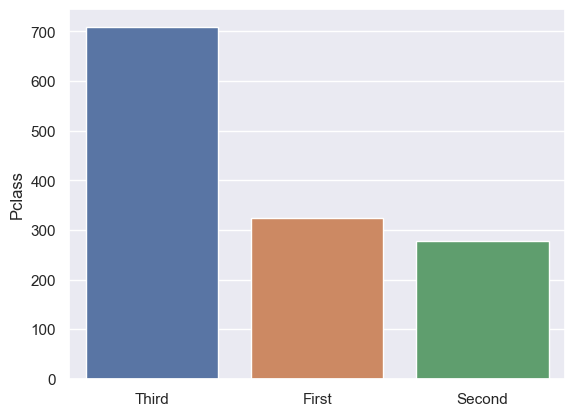

In [16]:
# graph showing the distribution of Pclass across the dataset
sns.barplot(x = data['Pclass'].unique(),
            y = data['Pclass'].value_counts())

### Name

In [17]:
# high number of unique names
data['Name'].nunique()

1307

In [18]:
# name column dropped due to high number of unique names
data.drop('Name', axis = 1, inplace = True)

### Sex

In [19]:
# no unique values
data['Sex'].isnull().sum()

0

<AxesSubplot:ylabel='Sex'>

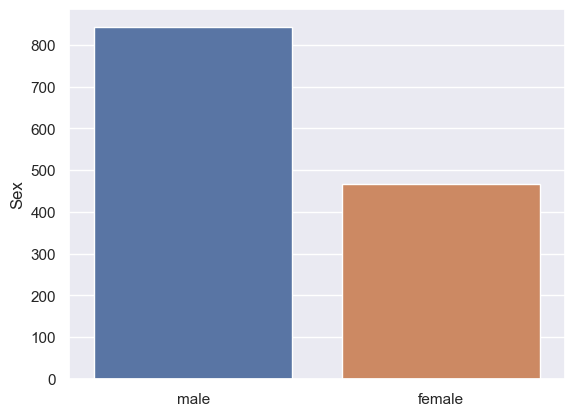

In [20]:
# graph showing the distribution of sex across the dataset
sns.barplot(x = data['Sex'].unique(),
            y = data['Sex'].value_counts())

### Age

In [21]:
# large number of null values
data['Age'].isnull().sum()

263

In [22]:
# calculating the mean age of the datset set
mean_age = data['Age'].mean()
mean_age

29.881137667304014

In [23]:
# filling na values with mean age
data['Age'] = data['Age'].fillna(mean_age)

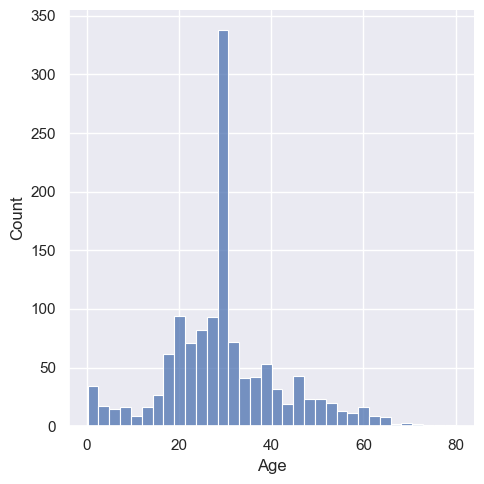

In [24]:
# graph showing the distribution of ages across the dataset
sns.displot(data['Age'])

### SibSp

In [25]:
# no null values in this column
data['SibSp'].isnull().sum()

0

<AxesSubplot:ylabel='SibSp'>

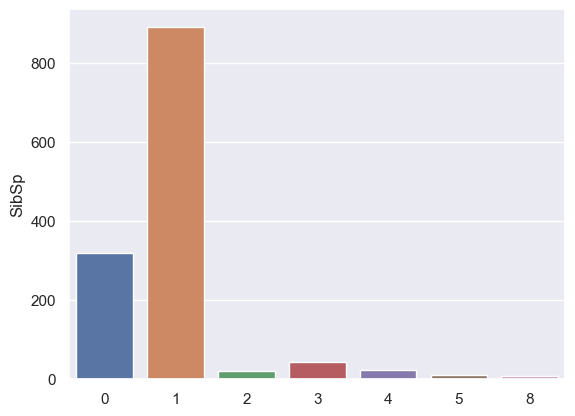

In [26]:
# graph showing the distribution of SibSp across the dataset
sns.barplot(x = data['SibSp'].unique(),
            y = data['SibSp'].value_counts())

### Parch

In [27]:
# no null values in this column
data['Parch'].isnull().sum()

0

<AxesSubplot:ylabel='Parch'>

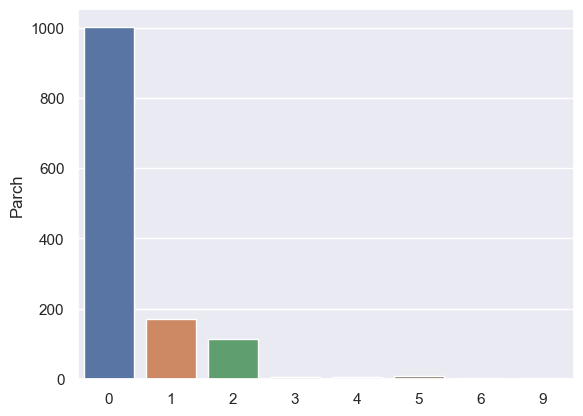

In [28]:
# graph showing the distribution of Parch across the dataset
sns.barplot(x = data['Parch'].unique(),
            y = data['Parch'].value_counts())

### Ticket (Number)

In [29]:
# high number of unique values
data['Ticket'].nunique()

929

In [30]:
# Ticket column dropped due to high number of unique Ticket number
data.drop(['Ticket'], axis = 1, inplace = True)

### Fare

In [31]:
# one null value in this column
data['Fare'].isnull().sum()

1

In [32]:
# calculating the mean fare price
mean_fare = data['Fare'].mean()
mean_fare

33.2954792813456

In [33]:
# filling na values with mean fare
data['Fare'] = data['Fare'].fillna(mean_fare)

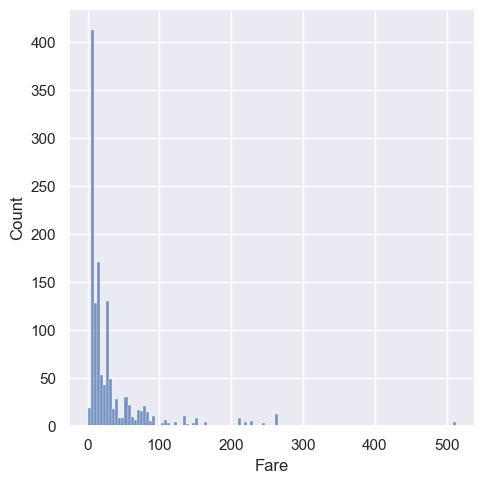

In [34]:
# graph showing the distribution of Fare across the dataset
sns.displot(data['Fare'])

In [35]:
# finding the highest fare values in the dataset
data['Fare'].sort_values(ascending = False).head(10)

PassengerId
1235    512.3292
680     512.3292
738     512.3292
259     512.3292
961     263.0000
28      263.0000
945     263.0000
342     263.0000
439     263.0000
89      263.0000
Name: Fare, dtype: float64

### Cabin

In [36]:
# high number of null values, highlighting not many had cabins
data['Cabin'].isnull().sum()

1014

In [37]:
# of those that had cabins there is a high number of unique cabin names
data['Cabin'].nunique()

186

In [38]:
# filling null values with zeros to indicate those which did not have cabins
data['Cabin'] = data['Cabin'].fillna(0)

In [39]:
# creating function to return 1 if the person had a cabin
def cabin_purchased(x):
    if x != 0:
        x = 1
        return x
    else:
        return x

In [40]:
# applying function
data['Cabin'] = data['Cabin'].apply(lambda x : cabin_purchased(x))

In [41]:
cabin = data['Cabin']

In [42]:
# cabin values afer processing
data['Cabin']

PassengerId
1       0
2       1
3       0
4       1
5       0
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Cabin, Length: 1309, dtype: int64

<AxesSubplot:ylabel='Cabin'>

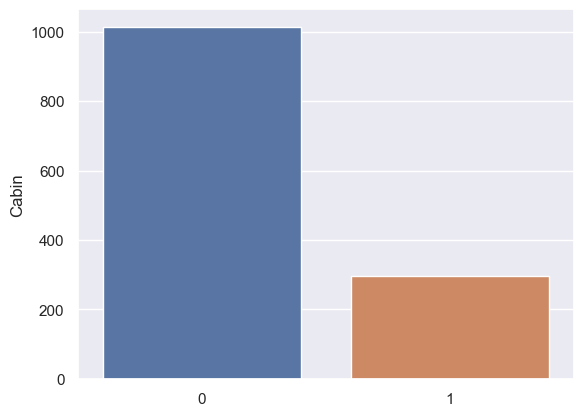

In [43]:
# graph showing the distribution of Cabin across the dataset
sns.barplot(x = data['Cabin'].unique(),
            y = data['Cabin'].value_counts())

### Embarked

In [44]:
# there are some null values in this column
data['Embarked'].isnull().sum()

2

In [45]:
# these can be seen below
data[data['Embarked'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
62,First,female,38.0,0,0,80.0,1,NaN
830,First,female,62.0,0,0,80.0,1,NaN


In [46]:
# three unique values for embarked.
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [47]:
# 55% of first class passengers boarded at Southampton and this is where the ship's journey started
# this information was obtained from research online
# therefore 'S' (Southampton) used to fill na's
data['Embarked'] = data['Embarked'].fillna('S')

In [48]:
# values converted to full names for use in graph
def embark_locations(x):
    if x == 'S':
        return 'Southampton'
    if x == 'C':
        return 'Cherbourg'
    else:
        return 'Queenstown'

In [49]:
# function applied
embarked_locations_text = data['Embarked'].apply(lambda x: embark_locations(x))

<AxesSubplot:ylabel='Embarked'>

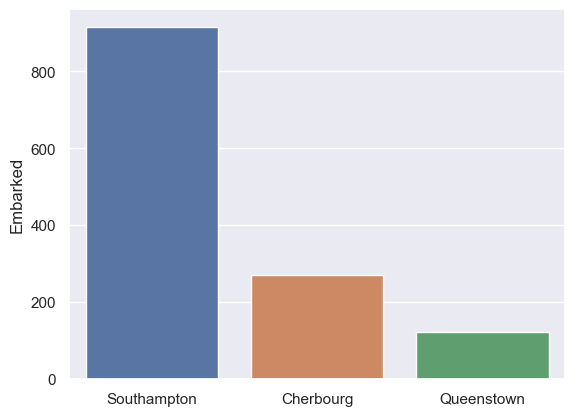

In [50]:
# graph showing the distribution of embakred across the dataset
sns.barplot(x = embarked_locations_text.unique(),
            y = embarked_locations_text.value_counts())

## Remaining Null Values

In [51]:
# Data has been preprocessed so there is no more remaining null values
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [52]:
data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,Third,male,22.000000,1,0,7.2500,0,S
2,First,female,38.000000,1,0,71.2833,1,C
3,Third,female,26.000000,0,0,7.9250,0,S
4,First,female,35.000000,1,0,53.1000,1,S
5,Third,male,35.000000,0,0,8.0500,0,S
6,Third,male,29.881138,0,0,8.4583,0,Q
7,First,male,54.000000,0,0,51.8625,1,S
8,Third,male,2.000000,3,1,21.0750,0,S
9,Third,female,27.000000,0,2,11.1333,0,S


## Survival Rates By Feature

### Overall Survival Rate

[[Text(0, 0, 'No'), Text(1, 0, 'Yes')]]

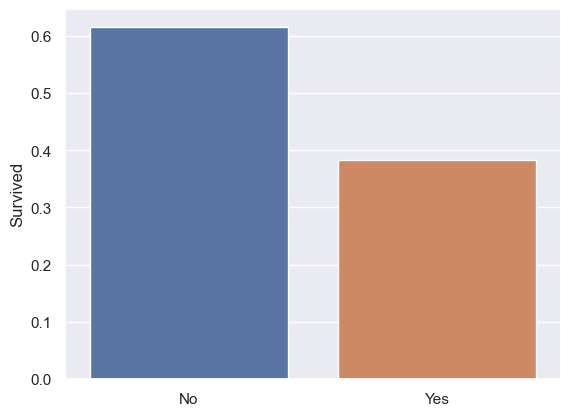

In [53]:
# graph showing the overall survival rate for all passengers
g = sns.barplot(x = train_targets.unique(),
            y = train_targets.value_counts()/train_targets.count())

g.set(xticklabels = ['No', 'Yes'])

### Sex and Class

Text(0, 0.5, 'Survival Probability')

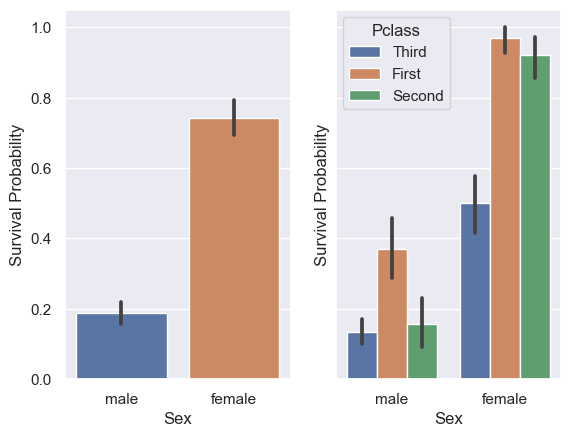

In [54]:
fig, ax = plt.subplots(1, 2, sharey = True)

# graph showing survival rate by sex
g1 = sns.barplot(x = 'Sex', y = train_targets, data = data, ax = ax [0])
g1.set_ylabel('Survival Probability')

# graph showing survival rate by sex and class
g2 = sns.barplot(x = 'Sex', y = train_targets, hue = 'Pclass', data = data, ax = ax[1])
g2.set_ylabel('Survival Probability')

### Age

In [55]:
# creating an age dataframe
age_df = pd.concat([data['Age'], train_targets], axis = 1)

In [56]:
# removing null data which are the test values that have no targets, leaving only the train data
age_df = age_df.dropna()

In [57]:
# rounding age column
age_df['Age'] = age_df['Age'].round()

In [58]:
age_df.head(5)

,Age,Survived
PassengerId,,
1,22.0,0.0
2,38.0,1.0
3,26.0,1.0
4,35.0,1.0
5,35.0,0.0


In [59]:
# due to the large number of different ages, the ages are grouped/categorised. categories are listed below.
age_cat = [[0,9],[10,19],[20,29],[30,39],[40,49],[50,59],[60,69],[70,79],[80]]

In [60]:
# defining function for categorising the age groups
def age_group(x):
    for cat in age_cat:
        if len(cat) > 1:
            if cat[0] <= x <= cat[1]:
                x = F"{cat[0]}-{cat[1]}"
                return x
        else:
            x = '80+'
            return x

In [61]:
# applying age group function
age_df['Group'] = age_df['Age'].apply(lambda x: age_group(x))

In [62]:
age_df.head()

,Age,Survived,Group
PassengerId,,,
1,22.0,0.0,20-29
2,38.0,1.0,30-39
3,26.0,1.0,20-29
4,35.0,1.0,30-39
5,35.0,0.0,30-39


In [63]:
# grouping by the age groups, aggregating by count and sum
age_analysis = age_df.groupby(age_df["Group"]).Survived.agg(["count","sum"])

In [64]:
# renaming the columns
age_analysis.rename({'count': 'Total', 'sum':'Survived'}, axis = 1, inplace = True)

In [65]:
# calculating the died column
age_analysis['Died'] = age_analysis['Total'] - age_analysis['Survived']

In [66]:
# calculating the survival probability
age_analysis['Survival_Probability'] = round(age_analysis['Survived']/age_analysis['Total'],2)

In [67]:
age_analysis

,Total,Survived,Died,Survival_Probability
Group,,,,
0-9,62,38.0,24.0,0.61
10-19,102,41.0,61.0,0.40
20-29,220,77.0,143.0,0.35
30-39,344,125.0,219.0,0.36
40-49,89,34.0,55.0,0.38
50-59,48,20.0,28.0,0.42
60-69,19,6.0,13.0,0.32
70-79,6,0.0,6.0,0.00
80+,1,1.0,0.0,1.00


<AxesSubplot:xlabel='Group'>

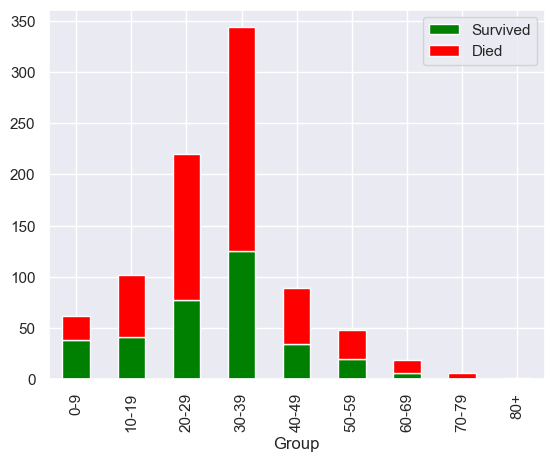

In [68]:
# stacked bar plot showing the number of people that survived and died by age group
age_analysis[['Survived', 'Died']].plot(kind = 'bar', stacked = 'True', color = ['green', 'red'])

Text(0, 0.5, 'Survival Probability')

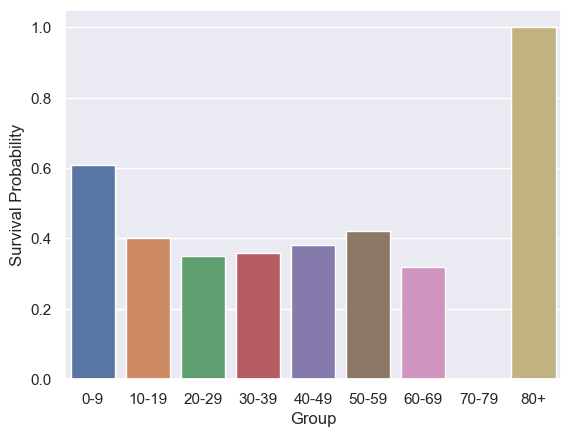

In [69]:
# graph showing the survival probability by age group
g = sns.barplot(x = age_analysis.index,
                y = age_analysis['Survival_Probability'])

g.set_ylabel('Survival Probability')

### Sibsp

In [70]:
# creating an sibsp dataframe
sibsp_df = pd.concat([data['SibSp'], train_targets], axis = 1)

In [71]:
# removing null data which are the test values that have no targets, leaving only the train data
sibsp_df = sibsp_df.dropna()

In [72]:
sibsp_df

,SibSp,Survived
PassengerId,,
1,1,0.0
2,1,1.0
3,0,1.0
4,1,1.0
5,0,0.0
...,...,...
887,0,0.0
888,0,1.0
889,1,0.0


In [73]:
# grouping by sibsp, aggregating by count and sum
sibsp_analysis = sibsp_df.groupby(sibsp_df["SibSp"]).Survived.agg(["count","sum"])

In [74]:
# renaming the columns
sibsp_analysis.rename({'count': 'Total', 'sum':'Survived'}, axis = 1, inplace = True)

In [75]:
# calculating the died column
sibsp_analysis['Died'] = sibsp_analysis['Total'] - sibsp_analysis['Survived']

In [76]:
# calculating the survival probability
sibsp_analysis['Survival_Probability'] = round(sibsp_analysis['Survived']/sibsp_analysis['Total'],2)

In [77]:
sibsp_analysis

,Total,Survived,Died,Survival_Probability
SibSp,,,,
0,608,210.0,398.0,0.35
1,209,112.0,97.0,0.54
2,28,13.0,15.0,0.46
3,16,4.0,12.0,0.25
4,18,3.0,15.0,0.17
5,5,0.0,5.0,0.00
8,7,0.0,7.0,0.00


Text(0, 0.5, 'Survival Probability')

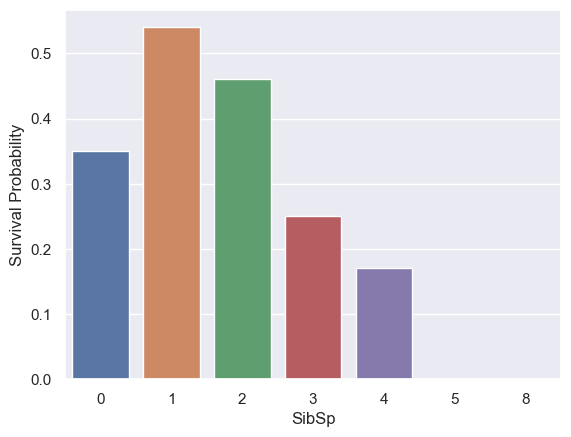

In [78]:
# graph showing the survival probability by sibsp
g = sns.barplot(x = sibsp_analysis.index,
                y = sibsp_analysis['Survival_Probability'])

g.set_ylabel('Survival Probability')

### Parch

In [79]:
# creating an parch dataframe
parch_df = pd.concat([data['Parch'], train_targets], axis = 1)

In [80]:
# removing null data which are the test values that have no targets, leaving only the train data
parch_df = parch_df.dropna()

In [81]:
# grouping by parch, aggregating by count and sum
parch_analysis = parch_df.groupby(parch_df['Parch']).Survived.agg(["count","sum"])

In [82]:
# renaming the columns
parch_analysis.rename({'count': 'Total', 'sum':'Survived'}, axis = 1, inplace = True)

In [83]:
# calculating the died column
parch_analysis['Died'] = parch_analysis['Total'] - parch_analysis['Survived']

In [84]:
# calculating the survival probability
parch_analysis['Survival_Probability'] = round(parch_analysis['Survived']/parch_analysis['Total'],2)

In [85]:
parch_analysis

,Total,Survived,Died,Survival_Probability
Parch,,,,
0,678,233.0,445.0,0.34
1,118,65.0,53.0,0.55
2,80,40.0,40.0,0.50
3,5,3.0,2.0,0.60
4,4,0.0,4.0,0.00
5,5,1.0,4.0,0.20
6,1,0.0,1.0,0.00


Text(0, 0.5, 'Survival Probability')

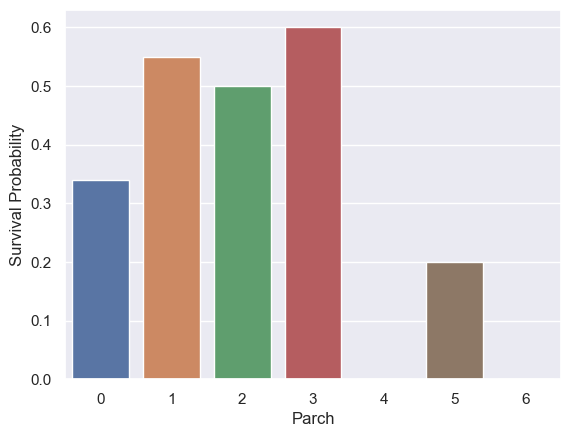

In [86]:
# graph showing the survival probability by sibsp
g = sns.barplot(x = parch_analysis.index,
                y = parch_analysis['Survival_Probability'])

g.set_ylabel('Survival Probability')

### Cabin

Text(0, 0.5, 'Survival Probability')

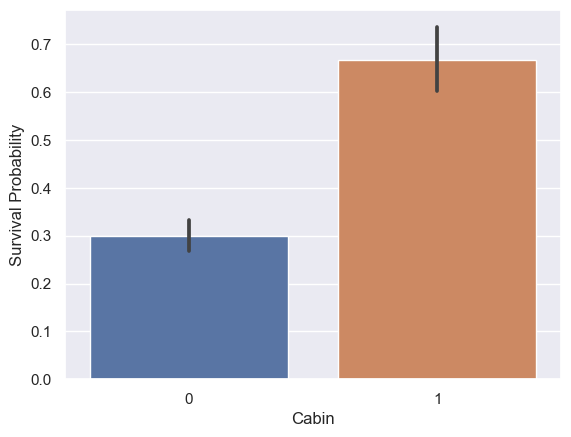

In [87]:
# graph showing survival probability by whether the passenger had a cabin or not
g = sns.barplot(x = 'Cabin', y = train_targets, data = data)
g.set_ylabel('Survival Probability')

### Embarked

In [88]:
# taken from previous embarked analysis above
embarked_locations_text.head()

PassengerId
1    Southampton
2      Cherbourg
3    Southampton
4    Southampton
5    Southampton
Name: Embarked, dtype: object

In [89]:
# creating an embarked dataframe
embarked_df = pd.concat([embarked_locations_text, train_targets], axis = 1)

In [90]:
# removing null data which are the test values that have no targets, leaving only the train data
embarked_df = embarked_df.dropna()

In [91]:
# grouping by embarked, aggregating by count and sum
embarked_analysis = embarked_df.groupby(embarked_df['Embarked']).Survived.agg(["count","sum"])

In [92]:
# renaming the columns
embarked_analysis.rename({'count': 'Total', 'sum':'Survived'}, axis = 1, inplace = True)

In [93]:
# calculating the died column
embarked_analysis['Died'] = embarked_analysis['Total'] - embarked_analysis['Survived']

In [94]:
# calculating the survival probability
embarked_analysis['Survival_Probability'] = round(embarked_analysis['Survived']/embarked_analysis['Total'],2)

In [95]:
embarked_analysis

,Total,Survived,Died,Survival_Probability
Embarked,,,,
Cherbourg,168,93.0,75.0,0.55
Queenstown,77,30.0,47.0,0.39
Southampton,646,219.0,427.0,0.34


Text(0, 0.5, 'Survival Probability')

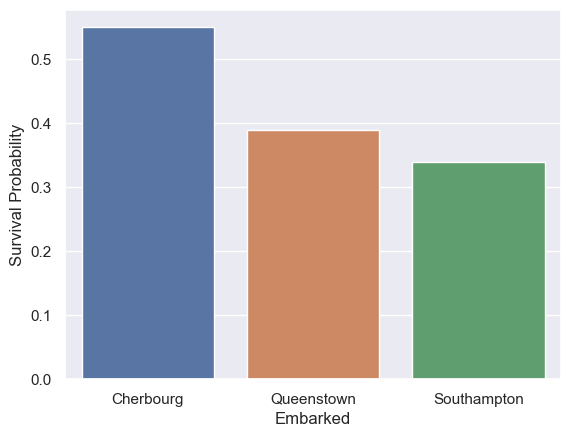

In [96]:
# graph showing survival probability by where the passenger embarked
g = sns.barplot(x = embarked_analysis.index,
                y = embarked_analysis['Survival_Probability'])

g.set_ylabel('Survival Probability')

## Scaling The Data

scaling is required to enchance the machine learning model

In [97]:
# picking the columns with numeric values to scale
columns_to_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [98]:
# creating a seperate dataframe for the scaled columns
data_to_scale = data[columns_to_scale]

In [99]:
data_to_scale.head()

,Age,SibSp,Parch,Fare
PassengerId,,,,
1,22.0,1,0,7.2500
2,38.0,1,0,71.2833
3,26.0,0,0,7.9250
4,35.0,1,0,53.1000
5,35.0,0,0,8.0500


In [100]:
# importing the relevant scaling module
from sklearn.preprocessing import StandardScaler

In [101]:
# creating the scaler object and fitting it to the data
scaler = StandardScaler()
scaler.fit(data_to_scale)

StandardScaler()

In [102]:
# scaling the data using scaler object
data_scaled = scaler.transform(data_to_scale)

In [103]:
data_scaled

array([[-0.61197171,  0.48128777, -0.4449995 , -0.50359486],
       [ 0.63043107,  0.48128777, -0.4449995 ,  0.73450256],
       [-0.30137101, -0.47908676, -0.4449995 , -0.49054359],
       ...,
       [ 0.66925616, -0.47908676, -0.4449995 , -0.50359486],
       [ 0.        , -0.47908676, -0.4449995 , -0.48812669],
       [ 0.        ,  0.48128777,  0.71076309, -0.21147268]])

In [104]:
# creating a dataframe to store the scaled data
data_scaled_df = pd.DataFrame(data = data_scaled, columns = columns_to_scale)

In [105]:
# adding 1 to the index so the index starts at the same value as the train targets index
data_scaled_df.index = data_scaled_df.index + 1

In [106]:
data_scaled_df.head()

,Age,SibSp,Parch,Fare
1,-0.611972,0.481288,-0.445,-0.503595
2,0.630431,0.481288,-0.445,0.734503
3,-0.301371,-0.479087,-0.445,-0.490544
4,0.397481,0.481288,-0.445,0.382925
5,0.397481,-0.479087,-0.445,-0.488127


## Creating dummy variables

dummy variables are required to included categorical data into the machine learning model

In [107]:
# selecting the columns to make dummy variables with
data_dummies_to_make = data.drop(columns_to_scale, axis = 1)

In [108]:
data_dummies_to_make

,Pclass,Sex,Cabin,Embarked
PassengerId,,,,
1,Third,male,0,S
2,First,female,1,C
3,Third,female,0,S
4,First,female,1,S
5,Third,male,0,S
...,...,...,...,...
1305,Third,male,0,S
1306,First,female,1,C
1307,Third,male,0,S


In [109]:
# 'Cabin' column has already been made into a dummy variable so is dropped
data_dummies_to_make.drop('Cabin', axis =  1, inplace = True)

In [110]:
data_dummies_to_make.head()

,Pclass,Sex,Embarked
PassengerId,,,
1,Third,male,S
2,First,female,C
3,Third,female,S
4,First,female,S
5,Third,male,S


In [111]:
# making the dummy variables and dropping the first to avoid multicollinearity
data_dummies = pd.get_dummies(data_dummies_to_make, drop_first = True)

In [112]:
data_dummies.head()

,Pclass_Second,Pclass_Third,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,
1,0,1,1,0,1
2,0,0,0,0,0
3,0,1,0,0,1
4,0,0,0,0,1
5,0,1,1,0,1


In [113]:
# re combining the scaled data, dummy variable and cabin columns.
data_processed = pd.concat([data_scaled_df, data_dummies, cabin], axis = 1)

In [114]:
# renaming the index to passenger id.
data_processed.rename_axis('PassengerId')

,Age,SibSp,Parch,Fare,Pclass_Second,Pclass_Third,Sex_male,Embarked_Q,Embarked_S,Cabin
PassengerId,,,,,,,,,,
1,-0.611972,0.481288,-0.445000,-0.503595,0,1,1,0,1,0
2,0.630431,0.481288,-0.445000,0.734503,0,0,0,0,0,1
3,-0.301371,-0.479087,-0.445000,-0.490544,0,1,0,0,1,0
4,0.397481,0.481288,-0.445000,0.382925,0,0,0,0,1,1
5,0.397481,-0.479087,-0.445000,-0.488127,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1305,0.000000,-0.479087,-0.445000,-0.488127,0,1,1,0,1,0
1306,0.708081,-0.479087,-0.445000,1.461829,0,0,0,0,0,1
1307,0.669256,-0.479087,-0.445000,-0.503595,0,1,1,0,1,0


## Spliting the test and train data sets

In [115]:
# reminder of the test index which included all the test index values
test_index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [116]:
# using the test_index to extract the test data
test_data = data_processed.loc[test_index, :]
test_data

,Age,SibSp,Parch,Fare,Pclass_Second,Pclass_Third,Sex_male,Embarked_Q,Embarked_S,Cabin
PassengerId,,,,,,,,,,
892,0.358655,-0.479087,-0.445000,-0.492396,0,1,1,1,0,0
893,1.329283,0.481288,-0.445000,-0.508429,0,1,0,0,1,0
894,2.494035,-0.479087,-0.445000,-0.456465,1,0,1,1,0,0
895,-0.223721,-0.479087,-0.445000,-0.476284,0,1,1,0,1,0
896,-0.611972,0.481288,0.710763,-0.406194,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1305,0.000000,-0.479087,-0.445000,-0.488127,0,1,1,0,1,0
1306,0.708081,-0.479087,-0.445000,1.461829,0,0,0,0,0,1
1307,0.669256,-0.479087,-0.445000,-0.503595,0,1,1,0,1,0


In [117]:
# using the test_index to extract the train data
train_data = data_processed.loc[: min(test_index) - 1, :]
train_data

,Age,SibSp,Parch,Fare,Pclass_Second,Pclass_Third,Sex_male,Embarked_Q,Embarked_S,Cabin
1,-0.611972,0.481288,-0.445000,-0.503595,0,1,1,0,1,0
2,0.630431,0.481288,-0.445000,0.734503,0,0,0,0,0,1
3,-0.301371,-0.479087,-0.445000,-0.490544,0,1,0,0,1,0
4,0.397481,0.481288,-0.445000,0.382925,0,0,0,0,1,1
5,0.397481,-0.479087,-0.445000,-0.488127,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
887,-0.223721,-0.479087,-0.445000,-0.392417,1,0,1,0,1,0
888,-0.844922,-0.479087,-0.445000,-0.063719,0,0,0,0,1,1
889,0.000000,0.481288,1.866526,-0.190364,0,1,0,0,1,0
890,-0.301371,-0.479087,-0.445000,-0.063719,0,0,1,0,0,1


## Shuffling Train Data and Train Targets

data set is shuffled for later use in machine learning model. shuffling helps to create a more accurate model.

In [118]:
# importing the random module required to shuffle the data
import random

In [119]:
# extracting the train data index
train_data_index = list(train_data.index)

In [120]:
# setting a random variable function so the shuffle is the same each time the notebook is run
def randomvariable():
    return 0.1

In [121]:
# shuffling the train data index
random.shuffle(train_data_index, randomvariable)

In [122]:
# shuffling the train data based of the new index
train_data = train_data.loc[train_data_index, :]
train_data.head()

,Age,SibSp,Parch,Fare,Pclass_Second,Pclass_Third,Sex_male,Embarked_Q,Embarked_S,Cabin
890,-0.301371,-0.479087,-0.445000,-0.063719,0,0,1,0,0,1
190,0.475131,-0.479087,-0.445000,-0.491108,0,1,1,0,1,0
290,-0.611972,-0.479087,-0.445000,-0.493927,0,1,0,1,0,0
390,-1.000223,-0.479087,-0.445000,-0.411753,1,0,0,0,0,0
490,-1.621424,0.481288,0.710763,-0.336345,0,1,1,0,1,0


In [123]:
# shuffling the train targets index the same way as the train data
train_targets = train_targets.loc[train_data_index]
train_targets.head()

PassengerId
890    1
190    0
290    1
390    1
490    1
Name: Survived, dtype: int64

## Rename Test Data And Exporting To .csv

In [124]:
# renaming to variable convention used in machine learning model
test_inputs = test_data

In [125]:
# exporting to csv for later reference
pd.Series(list(test_inputs.index)).to_csv('test_inputs_index.csv')

## Create Validation Dataset

validation dataset created to help avoid overfitting when using the machine learning model

In [126]:
# counting the number of rows in the train data set
train_counts = train_data.shape[0]
train_counts

891

In [127]:
# setting the percent of the training data that is to be used for the validation set
validation_percent = 0.05

In [128]:
# calculating the number of validation samples required.
validation_sample_count = int(validation_percent * train_counts)
validation_sample_count

44

In [129]:
# extracting the validation dataset from the train dataset
validation_inputs = train_data.iloc[:validation_sample_count, :]
validation_inputs.head()

,Age,SibSp,Parch,Fare,Pclass_Second,Pclass_Third,Sex_male,Embarked_Q,Embarked_S,Cabin
890,-0.301371,-0.479087,-0.445000,-0.063719,0,0,1,0,0,1
190,0.475131,-0.479087,-0.445000,-0.491108,0,1,1,0,1,0
290,-0.611972,-0.479087,-0.445000,-0.493927,0,1,0,1,0,0
390,-1.000223,-0.479087,-0.445000,-0.411753,1,0,0,0,0,0
490,-1.621424,0.481288,0.710763,-0.336345,0,1,1,0,1,0


In [130]:
# extracting the validation targets from the train targets
validation_targets = train_targets.iloc[:validation_sample_count]
validation_targets.head()

PassengerId
890    1
190    0
290    1
390    1
490    1
Name: Survived, dtype: int64

In [131]:
# remaining train data is used for the train inputs
train_inputs = train_data.iloc[validation_sample_count:, :]
train_inputs.head()

,Age,SibSp,Parch,Fare,Pclass_Second,Pclass_Third,Sex_male,Embarked_Q,Embarked_S,Cabin
450,1.717533,-0.479087,-0.445000,-0.054051,0,0,1,0,1,1
460,0.000000,-0.479087,-0.445000,-0.493927,0,1,1,1,0,0
470,-2.262038,1.441662,0.710763,-0.271412,0,1,0,0,0,0
480,-2.164975,-0.479087,0.710763,-0.406194,0,1,0,0,1,0
5,0.397481,-0.479087,-0.445000,-0.488127,0,1,1,0,1,0


In [132]:
# remaining train targets are used for the train targets dataset
train_targets = train_targets.iloc[validation_sample_count:]
train_targets.head()

PassengerId
450    1
460    0
470    1
480    1
5      0
Name: Survived, dtype: int64

## Save datasets as *.nqz

In [133]:
# saving the data as npz for use in the machine learning model
np.savez('Titanic_data_train', inputs = train_inputs, targets = train_targets)
np.savez('Titanic_data_validation', inputs = validation_inputs, targets = validation_targets)
np.savez('Titanic_data_test', inputs = test_inputs)

# Machine Learning Model - Notebook 2

In [134]:
# importing the relevant modules required for the machine learning model
import numpy as np
import tensorflow as tf
import pandas as pd

In [135]:
# loading the train npz
npz = np.load('Titanic_data_train.npz')

# loading the train inputs and targets
train_inputs = npz['inputs'].astype(float)
train_targets = npz['targets'].astype(int)

In [136]:
# loading the validation npz
npz = np.load('Titanic_data_validation.npz')

# loading the validation inputs and targets
validation_inputs = npz['inputs'].astype(float)
validation_targets = npz['targets'].astype(int)

In [137]:
# loading the test npz
npz = np.load('Titanic_data_test.npz')

# loading the test inputs
test_inputs = npz['inputs'].astype(float)

## Model

using tensorflow 2 to create the machine learning model

In [138]:
#specifying the number of inputs and outputs
input_size = 10
output_size = 2

#specifying the number units in the hidden layer
hidden_layer_size = 500

# specifying the number of layers and their respective activation functions. 
# softmax output layer is required for classification
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

# specifying the optimization algorithm, objective function as well as metrics to display after each epoch.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# specifying the batch size
batch_size = 50

# specifying the max number of epochs
max_epochs = 50

# setting an early stopping parameter to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)

# fitting the model based on the data and hyperparameters specified
model.fit(train_inputs,
          train_targets,
          batch_size=batch_size,
          epochs=max_epochs,
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_targets), 
          verbose = 2
          )  

Epoch 1/50
17/17 - 1s - loss: 0.5828 - accuracy: 0.7013 - val_loss: 0.4561 - val_accuracy: 0.7727 - 753ms/epoch - 44ms/step
Epoch 2/50
17/17 - 0s - loss: 0.4425 - accuracy: 0.8111 - val_loss: 0.4655 - val_accuracy: 0.7955 - 117ms/epoch - 7ms/step
Epoch 3/50
17/17 - 0s - loss: 0.4354 - accuracy: 0.8253 - val_loss: 0.3872 - val_accuracy: 0.8182 - 121ms/epoch - 7ms/step
Epoch 4/50
17/17 - 0s - loss: 0.4187 - accuracy: 0.8312 - val_loss: 0.4154 - val_accuracy: 0.7955 - 118ms/epoch - 7ms/step
Epoch 5/50
17/17 - 0s - loss: 0.3978 - accuracy: 0.8371 - val_loss: 0.4001 - val_accuracy: 0.7955 - 116ms/epoch - 7ms/step
Epoch 6/50
17/17 - 0s - loss: 0.3838 - accuracy: 0.8418 - val_loss: 0.3704 - val_accuracy: 0.8182 - 115ms/epoch - 7ms/step
Epoch 7/50
17/17 - 0s - loss: 0.3770 - accuracy: 0.8453 - val_loss: 0.4239 - val_accuracy: 0.8409 - 117ms/epoch - 7ms/step
Epoch 8/50
17/17 - 0s - loss: 0.3668 - accuracy: 0.8430 - val_loss: 0.5043 - val_accuracy: 0.8182 - 116ms/epoch - 7ms/step
Epoch 9/50
17/1

In [139]:
# predicting the test target values based off the trained model
predictions = model.predict(test_inputs).round(3)
print(predictions)

14/14 [==============================] - 0s 2ms/step
[[0.985 0.015]
 [0.675 0.325]
 [0.99  0.01 ]
 [0.954 0.046]
 [0.717 0.283]
 [0.899 0.101]
 [0.227 0.773]
 [0.96  0.04 ]
 [0.308 0.692]
 [0.957 0.043]
 [0.956 0.044]
 [0.854 0.146]
 [0.    1.   ]
 [0.912 0.088]
 [0.    1.   ]
 [0.    1.   ]
 [0.984 0.016]
 [0.736 0.264]
 [0.752 0.248]
 [0.697 0.303]
 [0.824 0.176]
 [0.087 0.913]
 [0.018 0.982]
 [0.243 0.757]
 [0.013 0.987]
 [0.972 0.028]
 [0.037 0.963]
 [0.786 0.214]
 [0.619 0.381]
 [0.93  0.07 ]
 [0.938 0.062]
 [0.972 0.028]
 [0.815 0.185]
 [0.78  0.22 ]
 [0.486 0.514]
 [0.63  0.37 ]
 [0.662 0.338]
 [0.539 0.461]
 [0.954 0.046]
 [0.649 0.351]
 [0.966 0.034]
 [0.606 0.394]
 [0.963 0.037]
 [0.013 0.987]
 [0.001 0.999]
 [0.956 0.044]
 [0.696 0.304]
 [0.979 0.021]
 [0.013 0.987]
 [0.814 0.186]
 [0.583 0.417]
 [0.939 0.061]
 [0.016 0.984]
 [0.001 0.999]
 [0.944 0.056]
 [0.974 0.026]
 [0.959 0.041]
 [0.874 0.126]
 [0.956 0.044]
 [0.    1.   ]
 [0.936 0.064]
 [0.966 0.034]
 [0.943 0.057]
 [

In [140]:
# each row list represents an individual passengers probability of survival
# position 0 is probability of death, position 1 is probability of surviving
# function returns the highest probability for that passenger.
np.argmax(predictions[0])

0

In [141]:
# creating an empty list to store the survival predictions
prediction_values = []

# looping through the predictions, returning the highest probability value for each passenger 
# and appending to prediction values list
for pred in predictions:
    if pred[0] == 1:
        prediction_values.append(0)
    else:
        prediction_values.append(np.argmax(pred))

In [142]:
# converting list to series
pd.Series(prediction_values)

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [143]:
# creating a dataframe from the test index index for submission
submission = pd.read_csv('test_inputs_index.csv', index_col= '0')
submission.drop('Unnamed: 0', axis = 1, inplace = True)
submission.index.name = 'PassengerId'

In [144]:
# adding the predictions to the submission dataframe
submission['Survived'] = prediction_values

In [145]:
submission

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [146]:
# calculating the total number of passengers predicted to survive
submission['Survived'].sum()

136

In [147]:
# saving submission dataframe as a csv, for submission on kaggle
submission.to_csv('Submission.csv')